# Simple Neural Network

In [69]:
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import pandas as pd
from tensorflow import keras

## Loading the data

In [58]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## Data shapes

In [59]:
x_train_length = X_train.shape[0]
y_train_length = len(y_train)
x_test_length = X_test.shape[0]
y_test_length = len(y_test)
input_shape = X_train.shape[1]

print('DATA SAMPLES SHAPE\n')
print('Training X: ', x_train_length)
print('Training y: ', y_train_length)
print('Test X: ', x_test_length)
print('Test y: ', y_test_length)
print('Input shape: ', input_shape)

DATA SAMPLES SHAPE

Training X:  60000
Training y:  60000
Test X:  10000
Test y:  10000
Input shape:  28


## Scale values to (0 to 1)
This will convert (0-255) values to (0,1)

In [60]:
X_train = X_train / 255
X_test = X_test / 255

## Flatten the dataset
This will convert multi-d array to 1-d array. You can skip this part if you want to use the built in flattening function by keras.

In [61]:
# flattened_X_train = X_train.reshape(x_train_length, input_shape**2)
# flattened_X_test = X_test.reshape(x_test_length, input_shape**2)

# flattened_X_test

In [71]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(input_shape, input_shape)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

training_history = model.fit(X_train, y_train, epochs=5)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1274 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0887 - accuracy: 0.9733
Epoch 4/5
1

## Model training evaluation

313/313 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9765


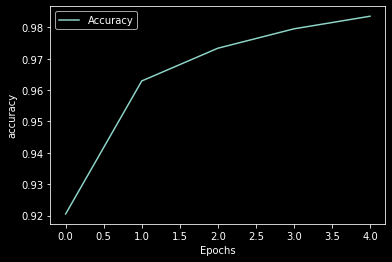

In [79]:
model.evaluate(X_test, y_test)

data_frame = pd.DataFrame(training_history.history['accuracy'])

plt.plot(data_frame, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

## Model sample prediction

313/313 [==============================] - 0s 950us/step
Prediction:  7


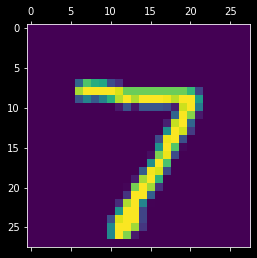

In [84]:
predicted_y = model.predict(X_test)

def classify(idx: int):
    plt.matshow(X_test[idx])
    print('Prediction: ', predicted_y[idx].argmax())

classify(0)

## Confusion Matrix

Text(33.0, 0.5, 'Truth')

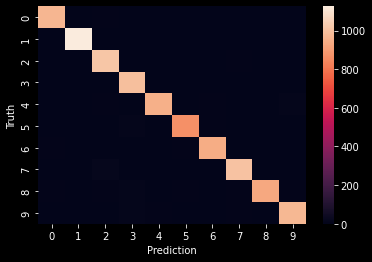

In [88]:
predicted_y_labels = [x.argmax() for x in predicted_y]

matrix = tf.math.confusion_matrix(labels=y_test, predictions=predicted_y_labels)

sn.heatmap(matrix)
plt.xlabel('Prediction')
plt.ylabel('Truth')